In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
hr_df=pd.read_csv("HR_comma_sep.csv")

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
hr_df.sample(5)

satisfaction_level  last_evaluation  number_project  \
6059                0.70             0.93               3   
1744                0.40             0.48               2   
9354                0.75             0.89               4   
1443                0.11             0.88               7   
9779                0.62             0.67               3   

      average_montly_hours  time_spend_company  Work_accident  left  \
6059                   185                   4              0     0   
1744                   161                   3              0     1   
9354                   139                   3              0     0   
1443                   305                   4              0     1   
9779                   212                   3              0     0   

      promotion_last_5years   department  salary  
6059                      0   accounting  medium  
1744                      0           IT  medium  
9354                      0    technical     low  
1443                      0  product_mng     low  
9779                      0    marketing  medium

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
hr_df.isnull().any().sum()

0

In [8]:
hr_df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [9]:
hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
# 1. What is the percentage of churn by salary bucket
salary_count=hr_df[['salary','left']].groupby(['salary','left']).size().reset_index()
salary_count.columns=['salary','left','count']
salary_count

salary  left  count
0    high     0   1155
1    high     1     82
2     low     0   5144
3     low     1   2172
4  medium     0   5129
5  medium     1   1317

In [16]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent=salary_count.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()
salary_percent

salary  left         0
0    high     0  0.933711
1    high     1  0.066289
2     low     0  0.703116
3     low     1  0.296884
4  medium     0  0.795687
5  medium     1  0.204313

In [12]:
hr_df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [13]:
numeric_var_names=[key for key in dict(hr_df.dtypes) if dict(hr_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(hr_df.dtypes) if dict(hr_df.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


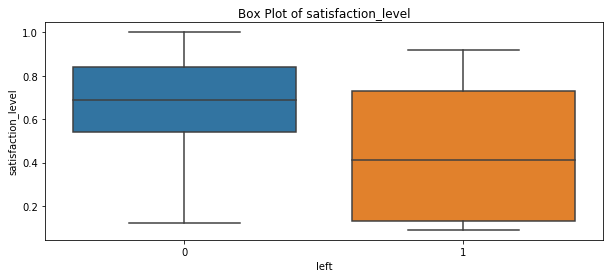

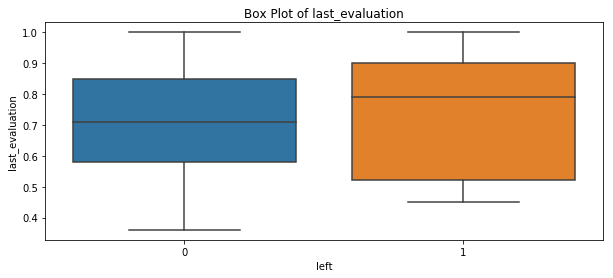

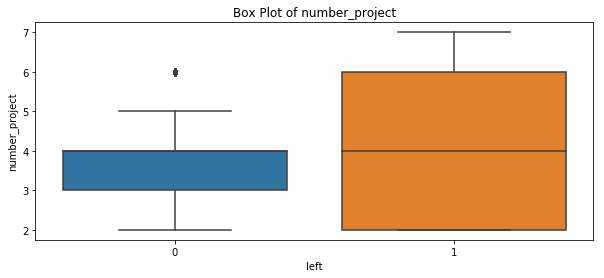

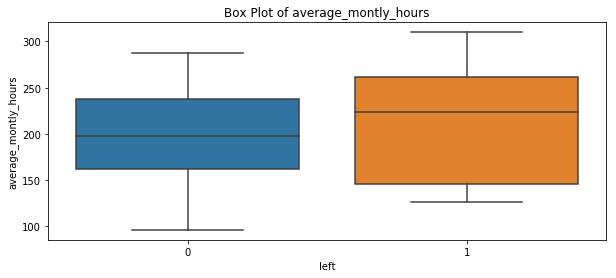

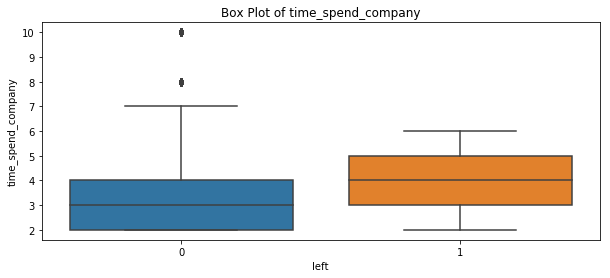

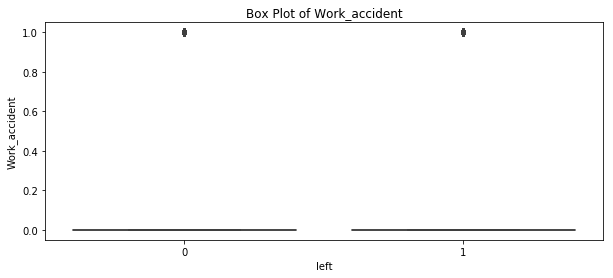

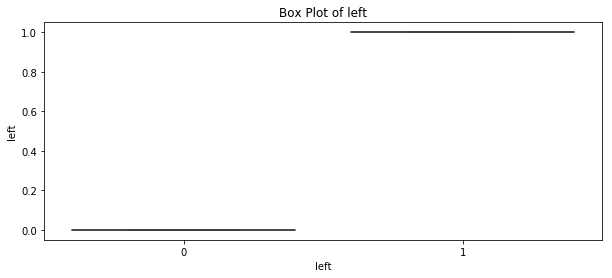

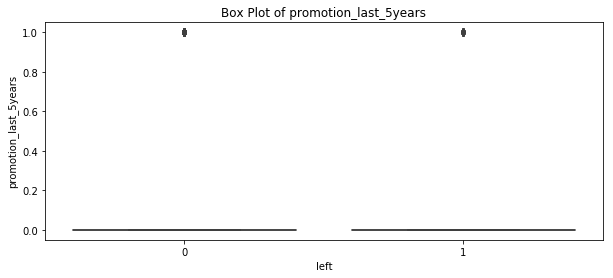

In [14]:
bp = PdfPages('BoxPlots with Attrition Split.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='left', y=num_variable, data = hr_df)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

In [17]:
## 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

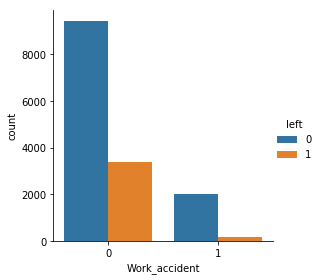

In [19]:
sns.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar")

In [20]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

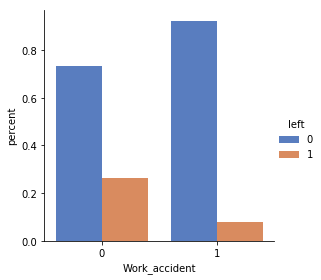

In [21]:
sns.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

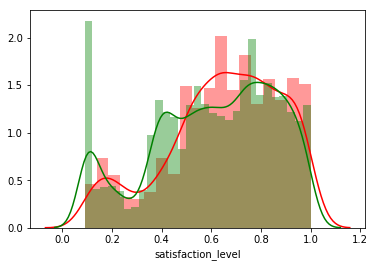

In [22]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sns.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sns.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

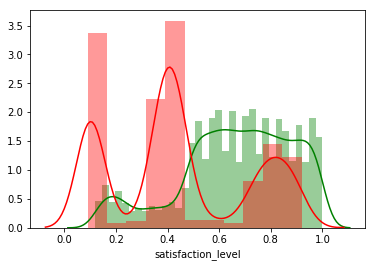

In [23]:
#4. How satisfaction levels influence whether to stay or leave the company?
sns.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sns.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

In [24]:
#It can be noted, large number of people who had lower satisfaction levels, have left the company. Especially, people who have satisfaction level less than 0.5

In [25]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
print(sl_left_mean)
sl_left_std=np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )
print(sl_left_std)

0.666809590479516
0.21709425554771716


In [26]:
sl_left_mean = np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )
print(sl_left_mean)
sl_left_std=np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )
print(sl_left_std)

0.44009801176140917
0.2638964784854295


In [27]:
# Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
# H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying
# H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying

In [28]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [29]:
#The test establishes that the average satisfaction levels are different.

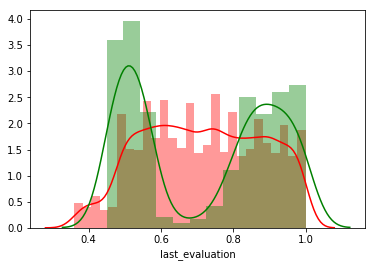

In [30]:
# 6.How last evaluation scores influencing whether to stay or leave the company?
sns.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sns.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

In [31]:
# People with low evaluation and very high evaluation are leaving, where as people with average evaluation scores are staying back

In [32]:
# 7.How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

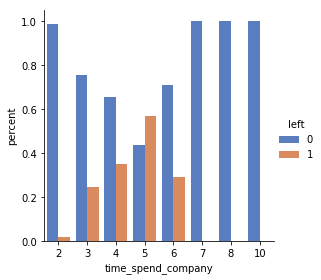

In [33]:
sns.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

In [34]:
#People who have spent 2 years are not leaving the company. 
#But as experience grows people start leaving and highest after they spend 5 years in the company.But once they cross the golden years '7', they are not leaving

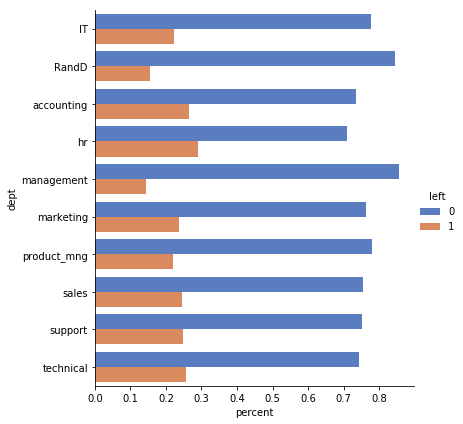

In [35]:
# 8.Which department has maximum attrition?

dept_count = hr_df[['department', 'left']].groupby(['department', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sns.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

In [36]:
#The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management

In [37]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

left                       0     1
promotion_last_5years             
0                      11128  3552
1                        300    19

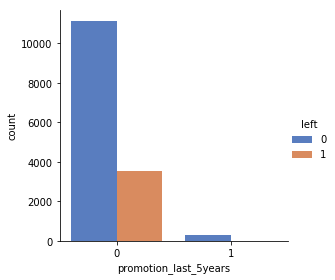

In [38]:
sns.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

In [39]:
#Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

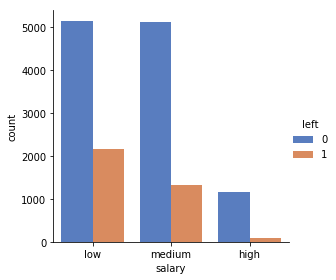

In [40]:
#10.  How Salary is influencing attrition decisions?
sns.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

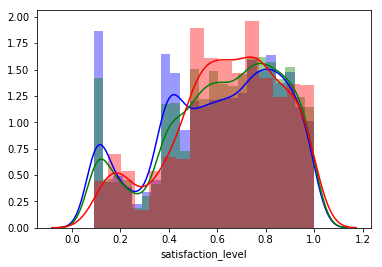

In [41]:
#11. Does higher salary lead to higher satisfaction level?
sns.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sns.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sns.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

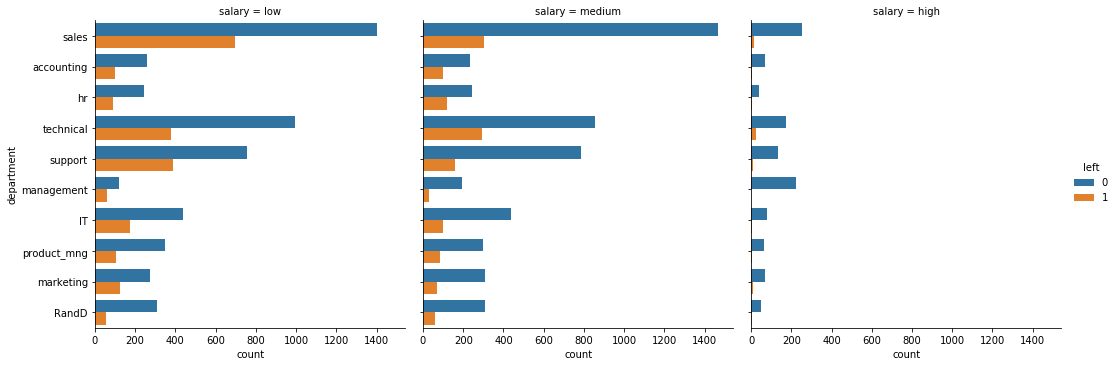

In [42]:
#12.How salaries across departments are related to attrition?
sns.factorplot( y = "department",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

In [43]:
# People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

In [44]:
hr_df.corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   

                       Work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_montly_hours       -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
Work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

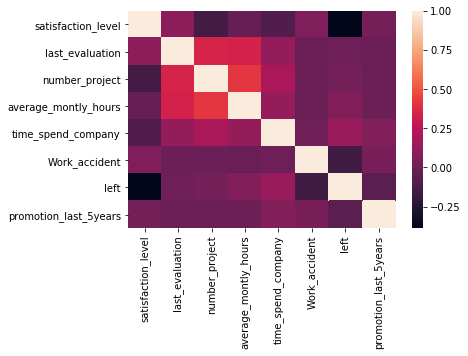

In [45]:
sns.heatmap(hr_df.corr())

In [46]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [47]:
for c_features in cat_var_names:
    hr_df=create_dummies(hr_df,c_features)

In [48]:
hr_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  salary_low  \
0                 1                   0                     0           1   
1                 1                   0                     0           0   
2                 1                   0                     0           0   
3                 1                   0                     0           1   
4                 1                   0                     0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [49]:
feature_columns=hr_df.columns.difference(['left'])
feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(hr_df[feature_columns],
                                               hr_df['left'],test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
list(zip(feature_columns,logreg.coef_[0]))

[('Work_accident', -1.492662273494587),
 ('average_montly_hours', 0.00497563736530884),
 ('department_RandD', -0.5707635761407588),
 ('department_accounting', 0.09300305900754494),
 ('department_hr', 0.35887713528557824),
 ('department_management', -0.36238815536107627),
 ('department_marketing', 0.13047433433399505),
 ('department_product_mng', 0.023809201215293938),
 ('department_sales', 0.0758418051023502),
 ('department_support', 0.1349394309914213),
 ('department_technical', 0.19545538155206246),
 ('last_evaluation', 0.5925856573690121),
 ('number_project', -0.3037334962620707),
 ('promotion_last_5years', -1.2172794133484774),
 ('salary_low', 1.8131726398256902),
 ('salary_medium', 1.3088619671071344),
 ('satisfaction_level', -4.10826751051314),
 ('time_spend_company', 0.26529824928293405)]

In [53]:
logreg.intercept_

array([-1.53003338])

In [54]:
hr_test_predict=pd.DataFrame({'actual':test_y,'Predict':logreg.predict(test_X)})

In [55]:
hr_test_predict.sample(5)

actual  Predict
794         1        1
10175       0        0
7583        0        0
11410       0        1
741         1        0

In [56]:
hr_test_predict=hr_test_predict.reset_index()

In [57]:
from sklearn import metrics
cm=metrics.confusion_matrix(hr_test_predict.actual,hr_test_predict.Predict,[1,0])
cm

array([[ 225,  481],
       [ 175, 2119]], dtype=int64)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 15.0, 'Predicted')

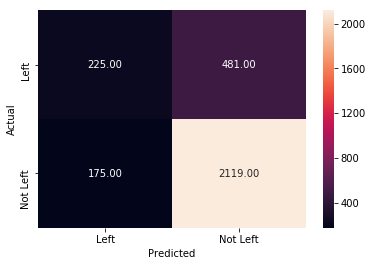

In [59]:
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Left','Not Left'],yticklabels=['Left','Not Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [60]:
score=metrics.accuracy_score(hr_test_predict.actual,hr_test_predict.Predict)
round(float(score),2)

0.78

## Decision Tree

In [61]:
import sklearn.tree as dt

In [62]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export
from sklearn.model_selection import GridSearchCV

In [63]:
clf_tree=DecisionTreeClassifier(max_depth=3)
clf_tree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
tree_train_predict=pd.DataFrame({'actual':train_y,'Predicted':clf_tree.predict(train_X)})

In [65]:
tree_train_predict.head()

actual  Predicted
9838       0          0
7689       0          0
6557       0          0
6872       0          1
820        1          1

In [66]:
tree_test_predict=pd.DataFrame({'actual':test_y,'Predicted':clf_tree.predict(test_X)})

In [67]:
tree_test_predict.head()

actual  Predicted
6723       0          0
6473       0          0
4679       0          0
862        1          1
7286       0          0

In [68]:
metrics.accuracy_score(tree_train_predict.actual,tree_train_predict.Predicted)

0.9525793816151346

In [69]:
metrics.accuracy_score(tree_test_predict.actual,tree_test_predict.Predicted)

0.951

In [70]:
tree_cm=metrics.confusion_matrix(tree_test_predict.actual,tree_test_predict.Predicted,[1,0])

Text(0.5, 15.0, 'Predicted')

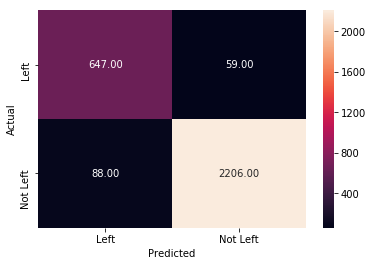

In [71]:
sns.heatmap(tree_cm,annot=True,fmt='.2f',xticklabels=['Left','Not Left'],yticklabels=['Left','Not Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Fine Tuning the Model

In [72]:
train_X.shape

(11999, 18)

In [73]:
param_grid={'max_depth':np.arange(1,20),'max_features':np.arange(2,18),'criterion':['gini','entropy']}

In [74]:
tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10)
tree.fit(train_X,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
dt_best=tree.best_estimator_

In [76]:
tree.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'max_features': 15}

In [77]:
tree.best_score_

0.9815817984832069

### Building Final Decision Tree Model

In [78]:
train_X.head()

Work_accident  average_montly_hours  department_RandD  \
9838              0                   188                 0   
7689              0                   196                 0   
6557              0                   175                 1   
6872              0                   112                 0   
820               0                   284                 0   

      department_accounting  department_hr  department_management  \
9838                      0              0                      0   
7689                      0              0                      0   
6557                      0              0                      0   
6872                      1              0                      0   
820                       0              0                      0   

      department_marketing  department_product_mng  department_sales  \
9838                     0                       1                 0   
7689                     0                       0                 0   
6557                     0                       0                 0   
6872                     0                       0                 0   
820                      0                       0                 0   

      department_support  department_technical  last_evaluation  \
9838                   0                     0             0.61   
7689                   0                     1             0.78   
6557                   0                     0             0.80   
6872                   0                     0             0.86   
820                    0                     1             0.93   

      number_project  promotion_last_5years  salary_low  salary_medium  \
9838               3                      0           1              0   
7689               4                      0           0              0   
6557               3                      0           0              1   
6872               4                      0           0              1   
820                7                      0           1              0   

      satisfaction_level  time_spend_company  
9838                1.00                   4  
7689                0.16                   5  
6557                0.80                   2  
6872                0.66                   6  
820                 0.11                   4

In [79]:
clf_tree=DecisionTreeClassifier(criterion='entropy',max_depth=19,max_features=15)
clf_tree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
tree_test_predict=pd.DataFrame({'actual':test_y,'Predicted':clf_tree.predict(test_X)})
tree_test_predict.sample(n=10)

actual  Predicted
14014       0          0
10972       0          0
6605        0          0
3844        0          0
9482        0          0
8796        0          0
1611        1          1
14254       1          1
6158        0          0
8280        0          0

In [81]:
metrics.accuracy_score(tree_test_predict.actual,tree_test_predict.Predicted)

0.9803333333333333

In [82]:
tree_cm=metrics.confusion_matrix(tree_test_predict.actual,tree_test_predict.Predicted,[1,0])

Text(0.5, 15.0, 'Predicted')

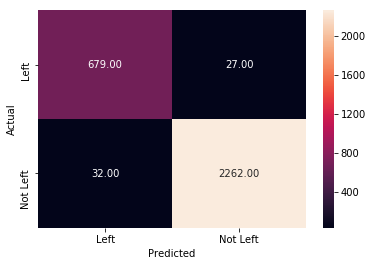

In [83]:
sns.heatmap(tree_cm,annot=True,fmt='.2f',xticklabels=['Left','Not Left'],yticklabels=['Left','Not Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Visualization of Decision Tree

In [84]:
import os
os.environ["PATH"]+=os.pathsep+'C:\Program Files (x86)\Graphviz2.38\bin'

In [85]:
export_graphviz(clf_tree,out_file="hr_tree.odt",feature_names=train_X.columns)

In [86]:
import pydotplus as pdot
chd_tree_graph=pdot.graphviz.graph_from_dot_file("hr_tree.odt")

In [87]:
chd_tree_graph.write_jpg("hr_tree.jpg")

True

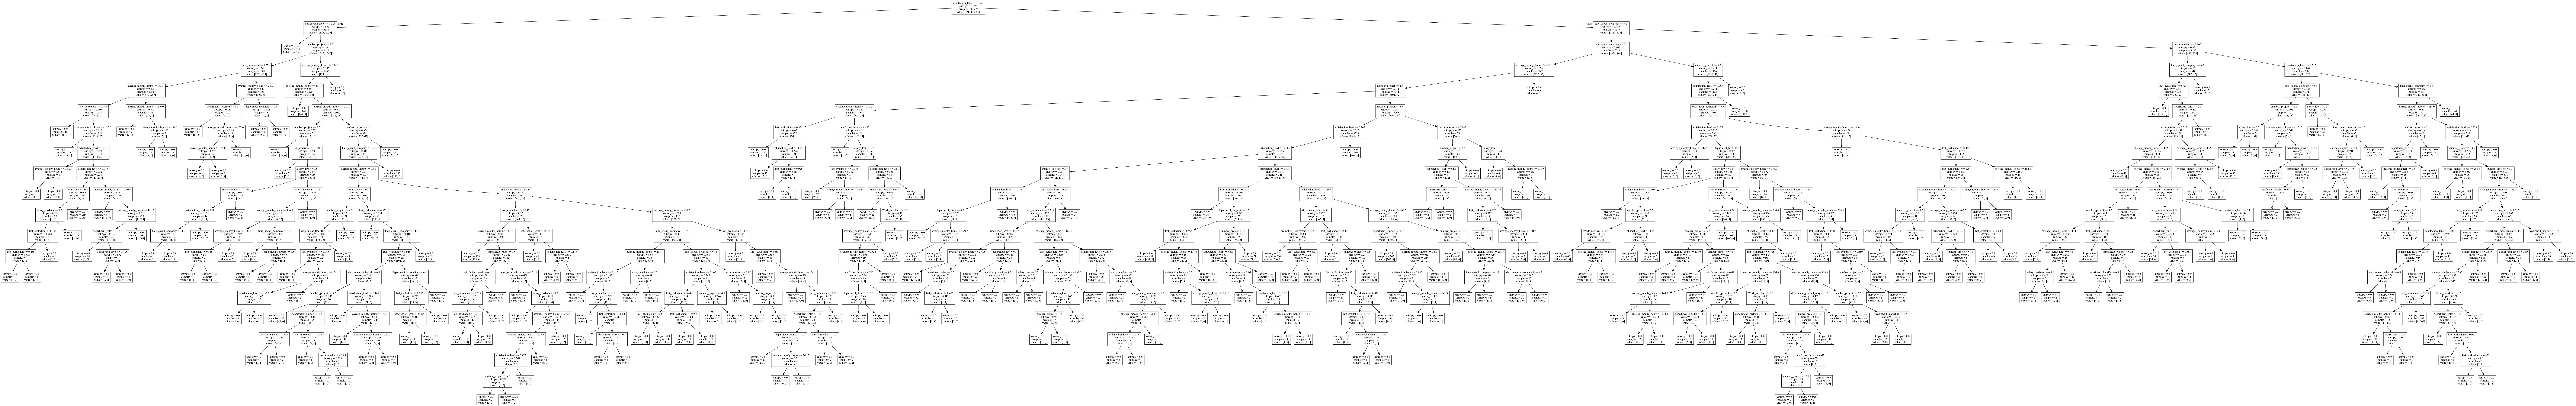

In [88]:
from IPython.display import Image
Image(filename="hr_tree.jpg")

### Bagged Decision Trees

In [89]:
import sklearn.ensemble as en

In [90]:
from sklearn.ensemble import BaggingClassifier

In [91]:
feature_columns=hr_df.columns.difference(['left'])
feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [92]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(hr_df[feature_columns],
                                               hr_df['left'],test_size=0.2,random_state=42)

In [93]:
param_grid={'n_estimators':[100,200,300,400],
            'max_samples':[0.9,0.8,0.7,0.6]}
tree=GridSearchCV(BaggingClassifier(warm_start=True),param_grid,cv=10)
tree.fit(train_X,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_samples': [0.9, 0.8, 0.7, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
  tree.best_params_

{'max_samples': 0.9, 'n_estimators': 100}

In [95]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100,max_samples= 0.9)
bagclm.fit(train_X, train_y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.9,
         n_estimators=100, n_jobs=None, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [96]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

In [97]:
bagclm.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0

In [98]:
metrics.accuracy_score( y_pred.actual, y_pred.predicted )

0.9873333333333333

Text(0.5, 15.0, 'Predicted label')

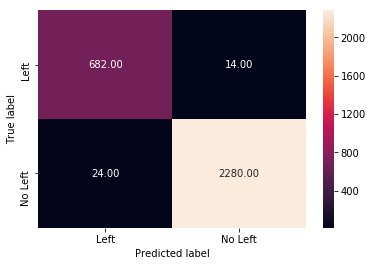

In [99]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sns.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### RandomForest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
param_grid={'n_estimators':[100,200,300,400],'max_depth':[3,4,5]}
tree=GridSearchCV(RandomForestClassifier(warm_start=True),param_grid,cv=2)
tree.fit(train_X,train_y)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
  tree.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [103]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=300,max_depth=5 )
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [104]:
radm_clf.oob_score_

0.9483290274189515

In [105]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [106]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.938

Text(0.5, 15.0, 'Predicted label')

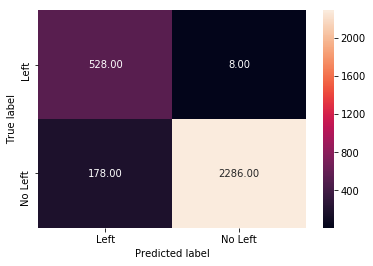

In [107]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [108]:
radm_clf.feature_importances_    #Average gain given by each variable

array([1.13321331e-02, 1.40482315e-01, 7.17153524e-04, 1.62139712e-04,
       2.29957055e-04, 6.08790457e-04, 4.93888252e-05, 1.27089391e-04,
       2.95144578e-04, 1.84567897e-04, 4.29183661e-04, 1.03322638e-01,
       2.17020008e-01, 1.19221855e-03, 6.37286839e-03, 1.59889496e-03,
       3.43830449e-01, 1.72045060e-01])

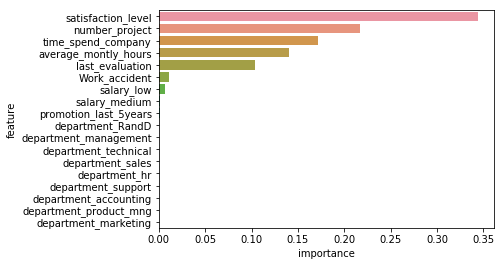

In [109]:
indices=np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [110]:
indices=np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

rank                 feature  importance
0     1      satisfaction_level    0.343830
1     2          number_project    0.217020
2     3      time_spend_company    0.172045
3     4    average_montly_hours    0.140482
4     5         last_evaluation    0.103323
5     6           Work_accident    0.011332
6     7              salary_low    0.006373
7     8           salary_medium    0.001599
8     9   promotion_last_5years    0.001192
9    10        department_RandD    0.000717
10   11   department_management    0.000609
11   12    department_technical    0.000429
12   13        department_sales    0.000295
13   14           department_hr    0.000230
14   15      department_support    0.000185
15   16   department_accounting    0.000162
16   17  department_product_mng    0.000127
17   18    department_marketing    0.000049

In [124]:
train_x2=train_X.copy()

In [125]:
train_x2['Random']=np.random.random(train_x2.shape[0])

In [126]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=300,max_depth=5 )
radm_clf.fit( train_x2, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

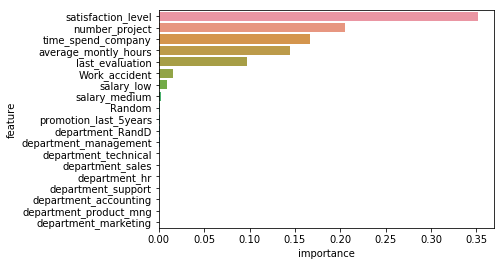

In [127]:
indices=np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x2.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x2.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

### Boosting

In [129]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [131]:
pargrid_ada={'n_estimators':[100,200,400,600,800],
            'learning_rate': [10**x for x in range(-3,0)]}

In [134]:
gscv_ada=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=pargrid_ada,
                     cv=2,verbose=False,n_jobs=-1)

In [135]:
gscv_ada.fit(train_X,train_y)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [136]:
gscv_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [137]:
clf_ada=gscv_ada.best_estimator_

In [138]:
gscv_ada.best_score_

0.9586632219351613

In [140]:
from sklearn.model_selection import cross_val_score

In [144]:
print(pd.Series(cross_val_score(clf_ada,train_X,train_y,cv=10,)).describe()[['min','max','mean']])
print(pd.Series(cross_val_score(clf_ada,test_X,test_y,cv=10,)).describe()[['min','max','mean']])


min     0.951626
max     0.970025
mean    0.960579
dtype: float64
min     0.940199
max     0.973333
mean    0.959004
dtype: float64


In [148]:
pargrid_gb={'n_estimators':[100,200,400,600,800],
          'learning_rate': [10**x for x in range(-3,0)]}

In [149]:
gscv_gb=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=pargrid_gb,
                     cv=2,verbose=False,n_jobs=-1)


In [150]:
gscv_gb.fit(train_X,train_y)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [152]:
gscv_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [153]:
clf_gb=gscv_gb.best_estimator_

In [154]:
gscv_gb.best_score_

0.9824152012667722

In [155]:
print(pd.Series(cross_val_score(clf_gb,train_X,train_y,cv=10,)).describe()[['min','max','mean']])
print(pd.Series(cross_val_score(clf_gb,test_X,test_y,cv=10,)).describe()[['min','max','mean']])


min     0.976686
max     0.989167
mean    0.984250
dtype: float64
min     0.956522
max     0.989967
mean    0.974003
dtype: float64
